# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Gradient Boosting Regressor and Classifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

# Import pickle
import pickle

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
pickle_path = 'pickle/'
results_path = 'results/'

convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
convabuse_sample = convabuse.sample(frac=0.01, random_state=42)
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
dynamically_generated_hate_speech_sample = dynamically_generated_hate_speech.sample(frac=0.01, random_state=42)
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
online_abusive_attacks_sample = online_abusive_attacks.sample(frac=0.01, random_state=42)
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
us_elections_2020_hate_speech_sample = us_elections_2020_hate_speech.sample(frac=0.01, random_state=42)
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.01, random_state=42)

In [4]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]
convabuse_X_sample = convabuse_sample.drop("abuse_level", axis=1)
convabuse_y_sample = convabuse_sample["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]
dghs_X_sample = dynamically_generated_hate_speech_sample.drop("label", axis=1)
dghs_y_sample = dynamically_generated_hate_speech_sample["label"]

In [8]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]
online_abusive_attacks_X_sample = online_abusive_attacks_sample.drop("Toxicity", axis=1)
online_abusive_attacks_y_sample = online_abusive_attacks_sample["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]
us2020hs_X_sample = us_elections_2020_hate_speech_sample.drop("HOF", axis=1)
us2020hs_y_sample = us_elections_2020_hate_speech_sample["HOF"]

In [12]:
mlma_hate_speech.head()

,index,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,7463,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,883,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5524,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5323,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12290,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("abuse_level", axis=1)
mlma_hate_speech_y = mlma_hate_speech["abuse_level"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("abuse_level", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["abuse_level"]

# Linear Modeling

In [14]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
convabuse_X_numeric_sample = convabuse_X_sample.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
dghs_X_numeric_sample = dghs_X_sample.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric_sample = online_abusive_attacks_X_sample.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
us2020hs_X_numeric_sample = us2020hs_X_sample.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [15]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)
convabuse_sample_scaler = StandardScaler()
convabuse_X_scaled_sample = convabuse_sample_scaler.fit_transform(convabuse_X_numeric_sample)
convabuse_X_scaled_sample = pd.DataFrame(convabuse_X_scaled_sample, columns=convabuse_X_numeric_sample.columns)

In [16]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)
dghs_sample_scaler = StandardScaler()
dghs_X_scaled_sample = dghs_sample_scaler.fit_transform(dghs_X_numeric_sample)
dghs_X_scaled_sample = pd.DataFrame(dghs_X_scaled_sample, columns=dghs_X_numeric_sample.columns)

In [17]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)
online_abusive_attacks_sample_scaler = StandardScaler()
online_abusive_attacks_X_scaled_sample = online_abusive_attacks_sample_scaler.fit_transform(online_abusive_attacks_X_numeric_sample)
online_abusive_attacks_X_scaled_sample = pd.DataFrame(online_abusive_attacks_X_scaled_sample, columns=online_abusive_attacks_X_numeric_sample.columns)

In [18]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)
us2020hs_sample_scaler = StandardScaler()
us2020hs_X_scaled_sample = us2020hs_sample_scaler.fit_transform(us2020hs_X_numeric_sample)
us2020hs_X_scaled_sample = pd.DataFrame(us2020hs_X_scaled_sample, columns=us2020hs_X_numeric_sample.columns)

In [19]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [20]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')
Index(['index', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')


In [21]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
convabuse_X_train_sample, convabuse_X_test_sample, convabuse_y_train_sample, convabuse_y_test_sample = train_test_split(convabuse_X_scaled_sample, convabuse_y_sample, test_size=0.2, random_state=42)

dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
dghs_X_train_sample, dghs_X_test_sample, dghs_y_train_sample, dghs_y_test_sample = train_test_split(dghs_X_scaled_sample, dghs_y_sample, test_size=0.2, random_state=42)

online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train_sample, online_abusive_attacks_X_test_sample, online_abusive_attacks_y_train_sample, online_abusive_attacks_y_test_sample = train_test_split(online_abusive_attacks_X_scaled_sample, online_abusive_attacks_y_sample, test_size=0.2, random_state=42)

us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
us2020hs_X_train_sample, us2020hs_X_test_sample, us2020hs_y_train_sample, us2020hs_y_test_sample = train_test_split(us2020hs_X_scaled_sample, us2020hs_y_sample, test_size=0.2, random_state=42)

mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [22]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train_sample)
dghs_length = len(dghs_X_train_sample)
online_abusive_attacks_length = len(online_abusive_attacks_X_train_sample)
us2020hs_length = len(us2020hs_X_train_sample)
mlma_hate_speech_length = len(mlma_hate_speech_X_train_sample)

In [23]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(402, 9, 5)

In [24]:
convabuse_sample_log2 = math.ceil(log2(convabuse_length))
convabuse_sample_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_sample_log2, convabuse_sample_1_percent

(402, 9, 5)

In [25]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(303, 9, 4)

In [26]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(19, 5, 1)

In [27]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(42, 6, 1)

In [28]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(427, 9, 5)

In [29]:
mlma_hate_speech_sample_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_sample_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_sample_log2, mlma_hate_speech_sample_1_percent

(427, 9, 5)

In [30]:
gb_regression_results_list = []

In [31]:
gb_classification_results_list = []

## Convabuse Decision Tree

In [32]:
convabuse_y_test_sample.value_counts()

abuse_level
4    24
2    22
1    21
3    17
0    17
Name: count, dtype: int64

In [33]:
convabuse_X_sample_split_count = int((len(convabuse_X_train_sample) / 10))
convabuse_X_sample_split_count

40

In [34]:
# Create a pipeline for the Gradient Boosting Classifier for the Convabuse dataset optimized for accuracy
convabuse_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
convabuse_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, convabuse_log2),
    'gb__min_samples_leaf': [convabuse_X_sample_split_count]
}

# Create a GridSearchCV object
convabuse_gb_grid_search = GridSearchCV(
    convabuse_gb_pipeline, 
    convabuse_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

In [35]:
# Fit the model
convabuse_gb_grid_search.fit(convabuse_X_train_sample, convabuse_y_train_sample)

Fitting 5 folds for each of 7920 candidates, totalling 39600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 9),
                         'gb__min_samples_leaf': [40],
                         'gb__n_estimators': range(1, 100)},
             scoring='accuracy', verbose=1)

In [36]:
# Get the best parameters
convabuse_gb_best_params = convabuse_gb_grid_search.best_params_

# Get the best score
convabuse_gb_best_score = convabuse_gb_grid_search.best_score_

# Print
print("Best Parameters:", convabuse_gb_best_params)
print("Best Score:", convabuse_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 1, 'gb__min_samples_leaf': 40, 'gb__n_estimators': 4}
Best Score: 0.29361111111111116


In [37]:
# Pickle the model
with open(f'{pickle_path}convabuse_gb_model.pkl', 'wb') as f:
    pickle.dump(convabuse_gb_grid_search, f)

In [38]:
# Import the model
with open(f'{pickle_path}convabuse_gb_model.pkl', 'rb') as f:
    convabuse_gb_model = pickle.load(f)

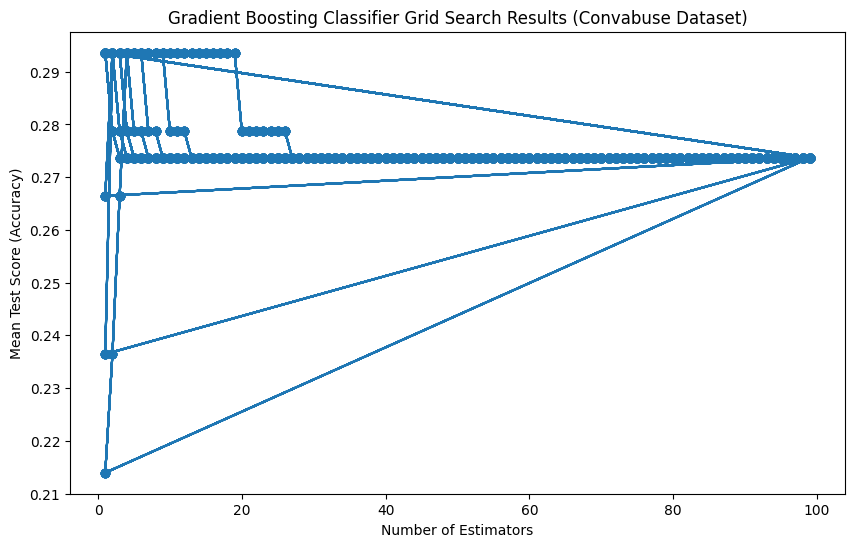

In [39]:
# Plot the grid search results for the Gradient Boosting Classifier on the Convabuse dataset
convabuse_gb_results_accuracy = pd.DataFrame(convabuse_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(convabuse_gb_results_accuracy['param_gb__n_estimators'], convabuse_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Convabuse Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [40]:
# Use the best estimator to make predictions on the test set
convabuse_gb_best_estimator = convabuse_gb_grid_search.best_estimator_
convabuse_gb_y_pred = convabuse_gb_best_estimator.predict(convabuse_X_test)

In [41]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the Convabuse dataset
convabuse_gb_accuracy = accuracy_score(convabuse_y_test, convabuse_gb_y_pred)
convabuse_gb_f1 = f1_score(convabuse_y_test, convabuse_gb_y_pred, average='weighted')

# Print the results
print(f'Convabuse Gradient Boosting Classifier Accuracy: {convabuse_gb_accuracy}')
print(f'Convabuse Gradient Boosting Classifier F1 Score: {convabuse_gb_f1}')

Convabuse Gradient Boosting Classifier Accuracy: 0.2801946762018276
Convabuse Gradient Boosting Classifier F1 Score: 0.15604460729529318


In [42]:
# Print the classification report for the Gradient Boosting Classifier on the Convabuse dataset
print("Classification Report for Convabuse Gradient Boosting Classifier:")
print(classification_report(convabuse_y_test, convabuse_gb_y_pred))

Classification Report for Convabuse Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42      2067
           1       0.00      0.00      0.00      1972
           2       0.00      0.00      0.00      2058
           3       0.33      0.38      0.35      2000
           4       0.00      0.00      0.00      1971

    accuracy                           0.28     10068
   macro avg       0.12      0.28      0.15     10068
weighted avg       0.12      0.28      0.16     10068



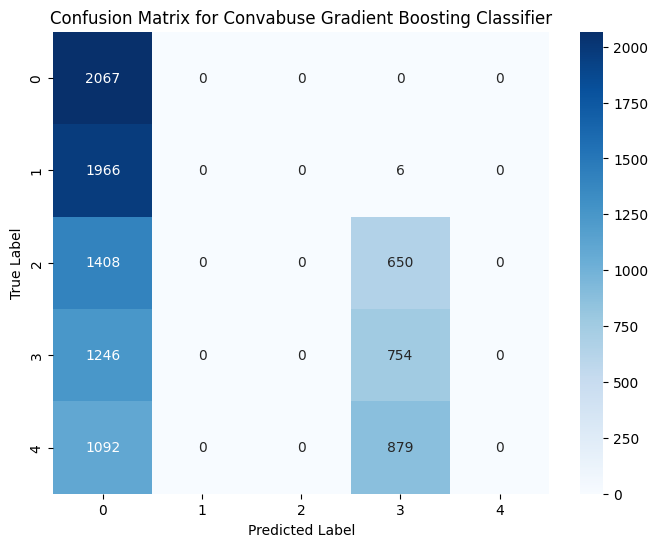

In [43]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the Convabuse dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(convabuse_y_test, convabuse_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "Convabuse",
    "NA",
    "NA",
    convabuse_gb_accuracy,
    convabuse_gb_f1,
    0.0,
    convabuse_gb_grid_search.best_params_
))

In [45]:
dghs_X_split_count = int((len(dghs_X_train_sample) / 10))
dghs_X_split_count

30

In [46]:
# Create a pipeline for the Gradient Boosting Classifier for the Dynamically Generated Hate Speech dataset optimized for accuracy
dghs_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
dghs_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, dghs_log2),
    'gb__min_samples_leaf': [dghs_X_split_count]
}

# Create a GridSearchCV object
dghs_gb_grid_search = GridSearchCV(
    estimator=dghs_gb_pipeline,
    param_grid=dghs_param_grid,
    scoring='accuracy',
    cv=5
)

In [47]:
# Fit the model
dghs_gb_grid_search.fit(dghs_X_train_sample, dghs_y_train_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 9),
                         'gb__min_samples_leaf': [30],
                         'gb__n_estimators': range(1, 100)},
             scoring='accuracy')

In [48]:
# Get the best parameters
dghs_gb_best_params = dghs_gb_grid_search.best_params_

# Get the best score
dghs_gb_best_score = dghs_gb_grid_search.best_score_

# Print
print("Best Parameters:", dghs_gb_best_params)
print("Best Score:", dghs_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 1, 'gb__min_samples_leaf': 30, 'gb__n_estimators': 3}
Best Score: 0.8284153005464482


In [49]:
# Pickle the model
with open(f'{pickle_path}dghs_gb_model.pkl', 'wb') as f:
    pickle.dump(dghs_gb_grid_search, f)

In [50]:
# Import the model
with open(f'{pickle_path}dghs_gb_model.pkl', 'rb') as f:
    dghs_gb_model = pickle.load(f)

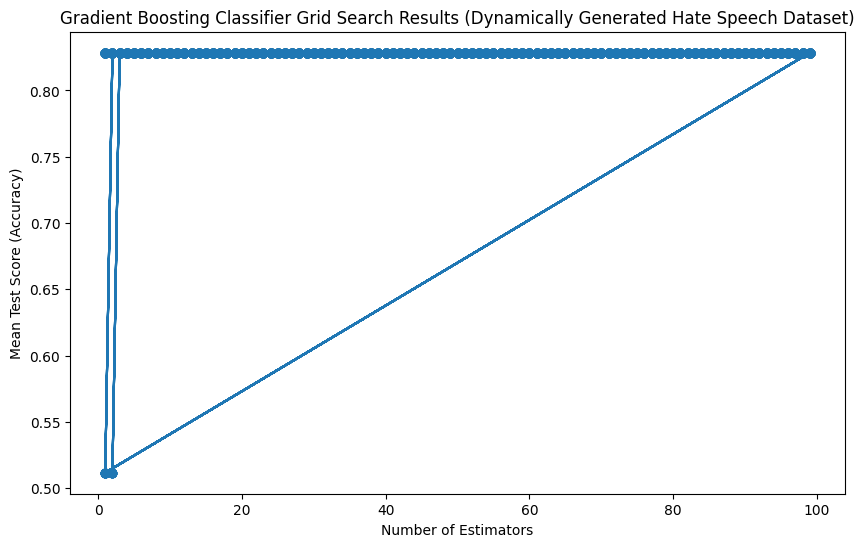

In [51]:
# Plot the grid search results for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
dghs_gb_results_accuracy = pd.DataFrame(dghs_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(dghs_gb_results_accuracy['param_gb__n_estimators'], dghs_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Dynamically Generated Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [52]:
# Use the best estimator to make predictions on the test set
dghs_gb_best_estimator = dghs_gb_grid_search.best_estimator_
dghs_gb_y_pred = dghs_gb_best_estimator.predict(dghs_X_test)

In [53]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
dghs_gb_accuracy = accuracy_score(dghs_y_test, dghs_gb_y_pred)
dghs_gb_f1 = f1_score(dghs_y_test, dghs_gb_y_pred, average='weighted')

In [54]:
# Print the results
print(f'Dynamically Generated Hate Speech Gradient Boosting Classifier Accuracy: {dghs_gb_accuracy}')
print(f'Dynamically Generated Hate Speech Gradient Boosting Classifier F1 Score: {dghs_gb_f1}')

Dynamically Generated Hate Speech Gradient Boosting Classifier Accuracy: 0.834870848708487
Dynamically Generated Hate Speech Gradient Boosting Classifier F1 Score: 0.8302887273632195


In [55]:
# Print the classification report for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
print("Classification Report for Dynamically Generated Hate Speech Gradient Boosting Classifier:")
print(classification_report(dghs_y_test, dghs_gb_y_pred))

Classification Report for Dynamically Generated Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.80      3800

    accuracy                           0.83      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.83      0.83      7588



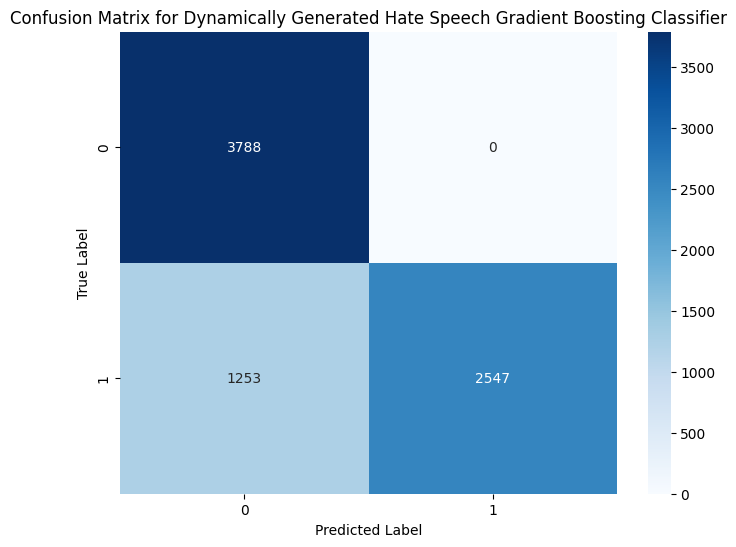

In [56]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(dghs_y_test, dghs_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [57]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_gb_accuracy,
    dghs_gb_f1,
    0.0,
    dghs_gb_grid_search.best_params_
))

In [58]:
oaa_X_split_count = int((len(online_abusive_attacks_X_train_sample) / 10))
oaa_X_split_count

1

In [59]:
# Create a pipeline for the Gradient Boosting Regressor for the Online Abusive Attacks dataset optimized for accuracy
oaa_gb_pipeline = Pipeline([
    ('gb', GradientBoostingRegressor())
])

# Define the parameter grid for GridSearchCV
oaa_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, online_abusive_attacks_log2),
    'gb__min_samples_leaf': [oaa_X_split_count]
}

# Create a GridSearchCV object
oaa_gb_grid_search = GridSearchCV(
    estimator=oaa_gb_pipeline,
    param_grid=oaa_param_grid,
    scoring='r2',
    cv=5
)

In [60]:
# Fit the model
oaa_gb_grid_search.fit(online_abusive_attacks_X_train_sample, online_abusive_attacks_y_train_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingRegressor())]),
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 5),
                         'gb__min_samples_leaf': [1],
                         'gb__n_estimators': range(1, 100)},
             scoring='r2')

In [61]:
# Get the best parameters
oaa_gb_best_params = oaa_gb_grid_search.best_params_

# Get the best score
oaa_gb_best_score = oaa_gb_grid_search.best_score_

# Print
print("Best Parameters:", oaa_gb_best_params)
print("Best Score:", oaa_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 1, 'gb__min_samples_leaf': 1, 'gb__n_estimators': 95}
Best Score: -0.01851773387270659


In [62]:
# Pickle the model
with open(f'{pickle_path}oaa_gb_model.pkl', 'wb') as f:
    pickle.dump(oaa_gb_grid_search, f)

In [63]:
# Import the model
with open(f'{pickle_path}oaa_gb_model.pkl', 'rb') as f:
    oaa_gb_grid_search = pickle.load(f)

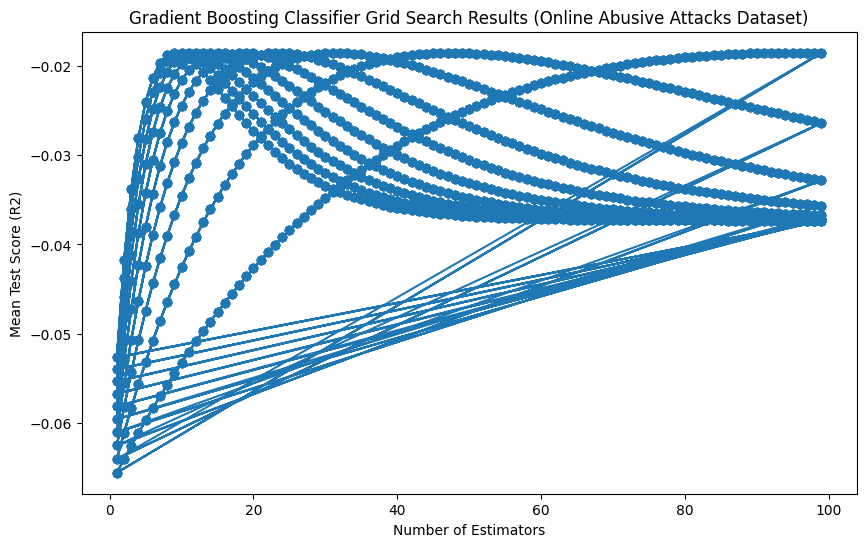

In [64]:
# Plot the grid search results for the Gradient Boosting Classifier on the Online Abusive Attacks dataset
oaa_gb_results_r2 = pd.DataFrame(oaa_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(oaa_gb_results_r2['param_gb__n_estimators'], oaa_gb_results_r2['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Online Abusive Attacks Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (R2)')
plt.show()

In [65]:
# Use the best estimator to make predictions on the test set
oaa_gb_best_estimator = oaa_gb_grid_search.best_estimator_
oaa_gb_y_pred = oaa_gb_best_estimator.predict(online_abusive_attacks_X_test)

In [66]:
# Calculate the RMSE and R2 score for the Gradient Boosting Classifier on the Online Abusive Attacks dataset
oaa_gb_rmse = root_mean_squared_error(online_abusive_attacks_y_test, oaa_gb_y_pred)
oaa_gb_r2 = r2_score(online_abusive_attacks_y_test, oaa_gb_y_pred)

# Print the results
print(f'Online Abusive Attacks Gradient Boosting Classifier RMSE: {oaa_gb_rmse}')
print(f'Online Abusive Attacks Gradient Boosting Classifier R2 Score: {oaa_gb_r2}')

Online Abusive Attacks Gradient Boosting Classifier RMSE: 14.950908865387422
Online Abusive Attacks Gradient Boosting Classifier R2 Score: 0.06021562844196271


In [67]:
# Append details to the results list
gb_regression_results_list.append((
    "Gradient Boosting", 
    "Online Abusive Attacks", 
    oaa_gb_rmse,
    oaa_gb_r2, 
    oaa_gb_grid_search.best_params_
))

In [68]:
us2020hs_X_split_count = int((len(us2020hs_X_train_sample) / 10))
us2020hs_X_split_count

4

In [69]:
# Create a pipeline for the Gradient Boosting Classifier for the US Elections 2020 Hate Speech dataset optimized for accuracy
us2020hs_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])


In [70]:
# Define the parameter grid for GridSearchCV
us2020hs_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, us2020hs_log2),
    'gb__min_samples_leaf': [us2020hs_X_split_count]
}

In [71]:
# Create a GridSearchCV object
us2020hs_gb_grid_search = GridSearchCV(
    estimator=us2020hs_gb_pipeline,
    param_grid=us2020hs_param_grid,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1,
    verbose=1
)


In [72]:
# Fit the model
us2020hs_gb_grid_search.fit(us2020hs_X_train_sample, us2020hs_y_train_sample)

Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 6),
                         'gb__min_samples_leaf': [4],
                         'gb__n_estimators': range(1, 100)},
             scoring='accuracy', verbose=1)

In [73]:
# Get the best parameters
us2020hs_gb_best_params = us2020hs_gb_grid_search.best_params_

# Get the best score
us2020hs_gb_best_score = us2020hs_gb_grid_search.best_score_

# Print
print("Best Parameters:", us2020hs_gb_best_params)
print("Best Score:", us2020hs_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 3, 'gb__min_samples_leaf': 4, 'gb__n_estimators': 60}
Best Score: 0.7222222222222222


In [74]:
# Pickle the model
with open(f'{pickle_path}us2020hs_gb_model.pkl', 'wb') as f:
    pickle.dump(us2020hs_gb_grid_search, f)

In [75]:
# Import the model
with open(f'{pickle_path}us2020hs_gb_model.pkl', 'rb') as f:
    us2020hs_gb_model = pickle.load(f)

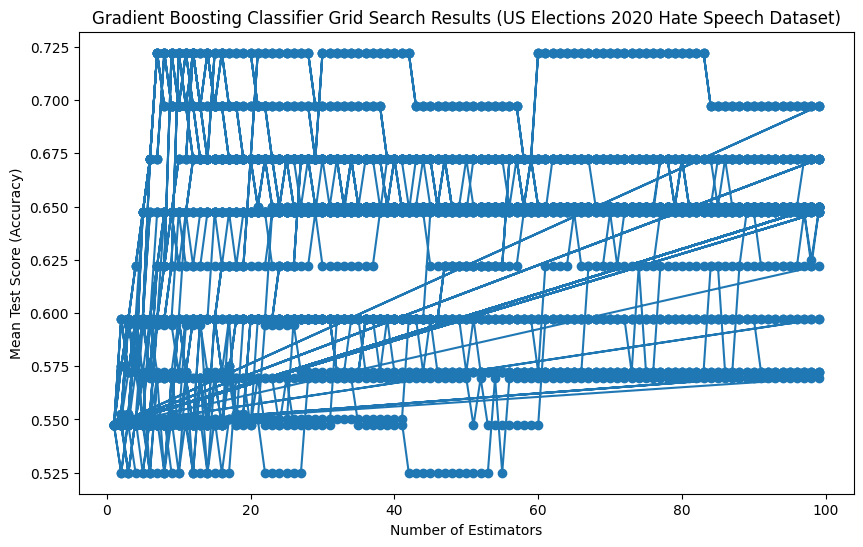

In [76]:
# Plot the grid search results for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_gb_results_accuracy = pd.DataFrame(us2020hs_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_gb_results_accuracy['param_gb__n_estimators'], us2020hs_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (US Elections 2020 Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [77]:
# Use the best estimator to make predictions on the test set
us2020hs_gb_best_estimator = us2020hs_gb_grid_search.best_estimator_
us2020hs_gb_y_pred = us2020hs_gb_best_estimator.predict(us2020hs_X_test)

In [78]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_gb_accuracy = accuracy_score(us2020hs_y_test, us2020hs_gb_y_pred)
us2020hs_gb_f1 = f1_score(us2020hs_y_test, us2020hs_gb_y_pred, average='weighted')

# Print the results
print(f'US Elections 2020 Hate Speech Gradient Boosting Classifier Accuracy: {us2020hs_gb_accuracy}')
print(f'US Elections 2020 Hate Speech Gradient Boosting Classifier F1 Score: {us2020hs_gb_f1}')

US Elections 2020 Hate Speech Gradient Boosting Classifier Accuracy: 0.6245283018867924
US Elections 2020 Hate Speech Gradient Boosting Classifier F1 Score: 0.6246031726836075


In [79]:
# Print the classification report for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
print("Classification Report for US Elections 2020 Hate Speech Gradient Boosting Classifier:")
print(classification_report(us2020hs_y_test, us2020hs_gb_y_pred))

Classification Report for US Elections 2020 Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       515
           1       0.64      0.62      0.63       545

    accuracy                           0.62      1060
   macro avg       0.62      0.62      0.62      1060
weighted avg       0.62      0.62      0.62      1060



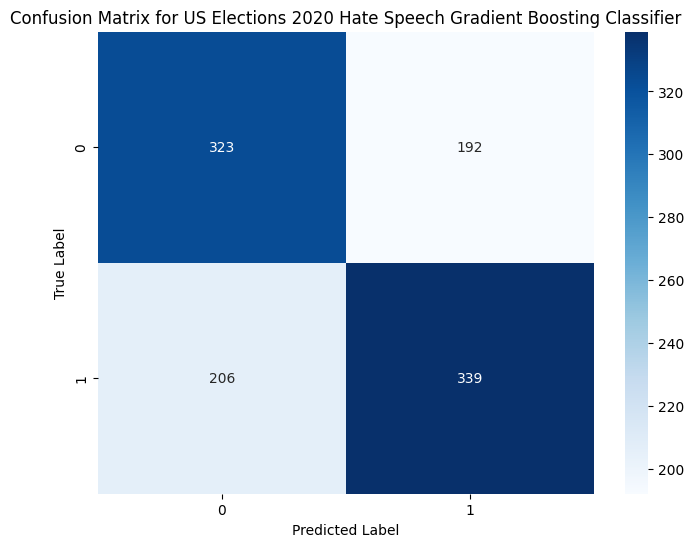

In [80]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(us2020hs_y_test, us2020hs_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Elections 2020 Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [81]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_gb_accuracy,
    us2020hs_gb_f1,
    0.0,
    us2020hs_gb_grid_search.best_params_
))

In [82]:
mlma_hate_speech_X_sample_split_count = int((len(mlma_hate_speech_X_train_sample) / 10))
mlma_hate_speech_X_sample_split_count

42

In [83]:
# Create a pipeline for the Gradient Boosting Classifier for the MLMA Hate Speech dataset optimized for accuracy
mlma_hate_speech_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
mlma_hate_speech_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, mlma_hate_speech_log2),
    'gb__min_samples_leaf': [mlma_hate_speech_X_sample_split_count]
}

# Create a GridSearchCV object
mlma_hate_speech_gb_grid_search = GridSearchCV(
    estimator=mlma_hate_speech_gb_pipeline,
    param_grid=mlma_hate_speech_param_grid,
    scoring='accuracy',
    cv=2,
    n_jobs=-1,
    verbose=1
)

In [84]:
# Fit the model
mlma_hate_speech_gb_grid_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

Fitting 2 folds for each of 7920 candidates, totalling 15840 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 9),
                         'gb__min_samples_leaf': [42],
                         'gb__n_estimators': range(1, 100)},
             scoring='accuracy', verbose=1)

In [85]:
# Get the best parameters
mlma_hate_speech_gb_best_params = mlma_hate_speech_gb_grid_search.best_params_

# Get the best score
mlma_hate_speech_gb_best_score = mlma_hate_speech_gb_grid_search.best_score_

# Print
print("Best Parameters:", mlma_hate_speech_gb_best_params)
print("Best Score:", mlma_hate_speech_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 1, 'gb__min_samples_leaf': 42, 'gb__n_estimators': 11}
Best Score: 0.9883177570093458


In [86]:
# Pickle the model
with open(f'{pickle_path}mlma_hate_speech_gb_model.pkl', 'wb') as f:
    pickle.dump(mlma_hate_speech_gb_grid_search, f)

In [87]:
# Import the model
with open(f'{pickle_path}mlma_hate_speech_gb_model.pkl', 'rb') as f:
    mlma_hate_speech_gb_model = pickle.load(f)

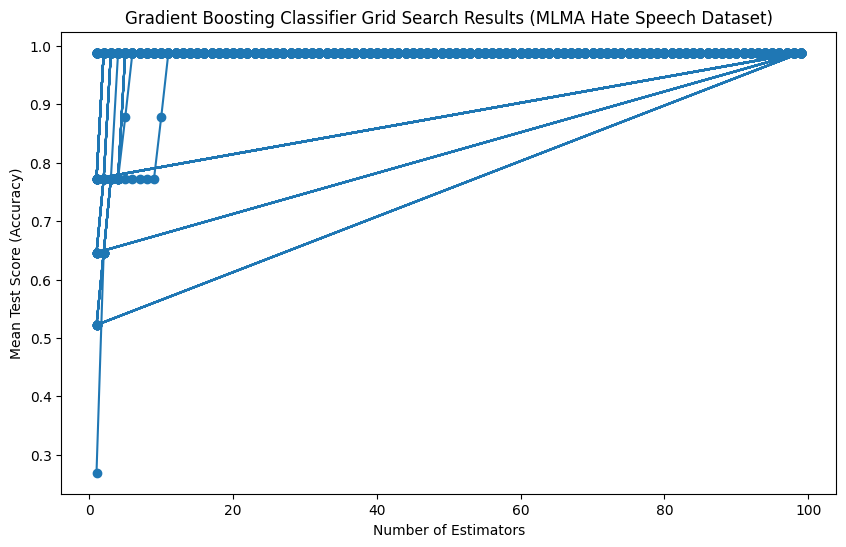

In [88]:
# Plot the grid search results for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_gb_results_accuracy = pd.DataFrame(mlma_hate_speech_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_gb_results_accuracy['param_gb__n_estimators'], mlma_hate_speech_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (MLMA Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [89]:
# Use the best estimator to make predictions on the test set
mlma_hate_speech_gb_best_estimator = mlma_hate_speech_gb_grid_search.best_estimator_
mlma_hate_speech_gb_y_pred = mlma_hate_speech_gb_best_estimator.predict(mlma_hate_speech_X_test)

In [90]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_gb_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred)
mlma_hate_speech_gb_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred, average='weighted')

# Print the results
print(f'MLMA Hate Speech Gradient Boosting Classifier Accuracy: {mlma_hate_speech_gb_accuracy}')
print(f'MLMA Hate Speech Gradient Boosting Classifier F1 Score: {mlma_hate_speech_gb_f1}')

MLMA Hate Speech Gradient Boosting Classifier Accuracy: 0.9952211394302849
MLMA Hate Speech Gradient Boosting Classifier F1 Score: 0.9952232579238176


In [91]:
# Print the classification report for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
print("Classification Report for MLMA Hate Speech Gradient Boosting Classifier:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred))

Classification Report for MLMA Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2690
           2       0.99      1.00      1.00      2607
           3       0.99      1.00      0.99      2680
           4       1.00      1.00      1.00      2695

    accuracy                           1.00     10672
   macro avg       1.00      1.00      1.00     10672
weighted avg       1.00      1.00      1.00     10672



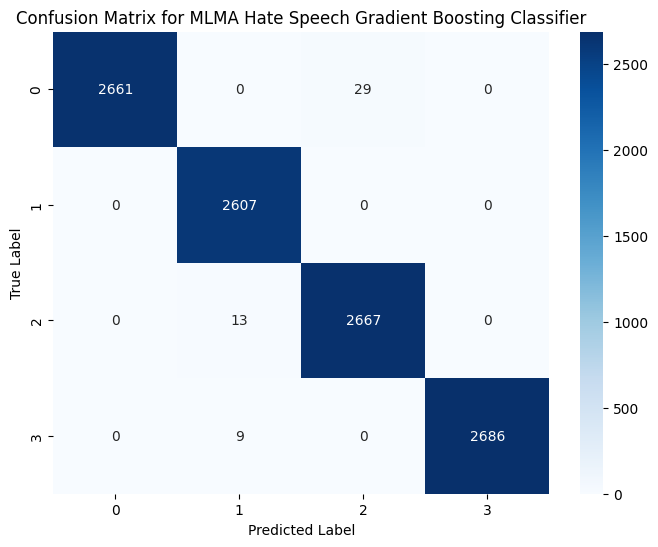

In [92]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [93]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_gb_accuracy,
    mlma_hate_speech_gb_f1,
    0.0,
    mlma_hate_speech_gb_grid_search.best_params_
))

## Support Vector Machine Conclusions

In [94]:
gb_regression_results_list

[('Gradient Boosting',
  'Online Abusive Attacks',
  14.950908865387422,
  0.06021562844196271,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 1,
   'gb__n_estimators': 95})]

In [95]:
gb_classification_results_list

[('Gradient Boosting',
  'Convabuse',
  'NA',
  'NA',
  0.2801946762018276,
  0.15604460729529318,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 40,
   'gb__n_estimators': 4}),
 ('Gradient Boosting',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.834870848708487,
  0.8302887273632195,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 30,
   'gb__n_estimators': 3}),
 ('Gradient Boosting',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.6245283018867924,
  0.6246031726836075,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 3,
   'gb__min_samples_leaf': 4,
   'gb__n_estimators': 60}),
 ('Gradient Boosting',
  'MLMA Hate Speech',
  'NA',
  'NA',
  0.9952211394302849,
  0.9952232579238176,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 42,
   'gb__n_estimators': 11})]

In [96]:
# Convert the gb_classification_results_list to a DataFrame
gb_classification_summary = pd.DataFrame(gb_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
gb_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Gradient Boosting,Convabuse,NA,NA,0.280195,0.156045,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 1..."
1,Gradient Boosting,Dynamically Generated Hate Speech,NA,NA,0.834871,0.830289,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 1..."
2,Gradient Boosting,US Elections 2020 Hate Speech,NA,NA,0.624528,0.624603,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 3..."
3,Gradient Boosting,MLMA Hate Speech,NA,NA,0.995221,0.995223,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 1..."


In [97]:
gb_regression_results_list

[('Gradient Boosting',
  'Online Abusive Attacks',
  14.950908865387422,
  0.06021562844196271,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 1,
   'gb__n_estimators': 95})]

In [98]:
# Convert the gb_regression_results_list to a DataFrame
gb_regression_summary = pd.DataFrame(gb_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
gb_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,Gradient Boosting,Online Abusive Attacks,14.950909,0.060216,"{'gb__learning_rate': 0.01, 'gb__max_depth': 1..."


In [99]:
gb_classification_summary.to_csv(f"{results_path}/model9_gb-classification-summary.csv", index=False)
gb_regression_summary.to_csv(f"{results_path}/model9_gb-regression-summary.csv", index=False)